# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
# print(html)
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
print(rate_table)


# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})

print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))

[<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="幣別國旗" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show" style="text-indent:30px;">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">29.665</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">30.335</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">30.015</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">30.115</td>
<td class="text-center print_hide phone-small-font" data-table="遠期匯率買入/賣出"><a href="/xrt/forward/USD">查詢</a

### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:
for i in rate_table:
    currency = i.find(name='div', attrs={'class': 'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 去掉空白
    buy_rate = i.find(name='td', attrs={'data-table': '本行現金買入'})
    sell_rate = i.find(name='td', attrs={'data-table': '本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" %(buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.665, 即時現金賣出: 30.335

港幣(HKD)

即時現金買入: 3.721, 即時現金賣出: 3.925

英鎊(GBP)

即時現金買入: 36.31, 即時現金賣出: 38.43

澳幣(AUD)

即時現金買入: 18.75, 即時現金賣出: 19.53

加拿大幣(CAD)

即時現金買入: 21.06, 即時現金賣出: 21.97

新加坡幣(SGD)

即時現金買入: 20.7, 即時現金賣出: 21.61

瑞士法郎(CHF)

即時現金買入: 30.31, 即時現金賣出: 31.51

日圓(JPY)

即時現金買入: 0.2682, 即時現金賣出: 0.281

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: 2.64, 即時現金賣出: 3.16

紐元(NZD)

即時現金買入: 17.86, 即時現金賣出: 18.71

泰幣(THB)

即時現金買入: 0.7932, 即時現金賣出: 0.9832

菲國比索(PHP)

即時現金買入: 0.5221, 即時現金賣出: 0.6551

印尼幣(IDR)

即時現金買入: 0.00153, 即時現金賣出: 0.00223

歐元(EUR)

即時現金買入: 32.07, 即時現金賣出: 33.41

韓元(KRW)

即時現金買入: 0.02311, 即時現金賣出: 0.02701

越南盾(VND)

即時現金買入: 0.00091, 即時現金賣出: 0.00141

馬來幣(MYR)

即時現金買入: 5.87, 即時現金賣出: 7.495

人民幣(CNY)

即時現金買入: 4.171, 即時現金賣出: 4.333


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)

2020/04/10
2020/04/09
2020/04/08
2020/04/07
2020/04/06
2020/04/01
         date  buy_rate  sell_rate
0  2020/04/10    29.665     30.335
1  2020/04/09    29.685     30.355
2  2020/04/08    29.715     30.385
3  2020/04/07    29.695     30.365
4  2020/04/06    29.780     30.450
5  2020/04/01    29.860     30.530
            buy_rate  sell_rate
date                           
2020/04/01    29.860     30.530
2020/04/06    29.780     30.450
2020/04/07    29.695     30.365
2020/04/08    29.715     30.385
2020/04/09    29.685     30.355
2020/04/10    29.665     30.335


<Figure size 720x720 with 0 Axes>

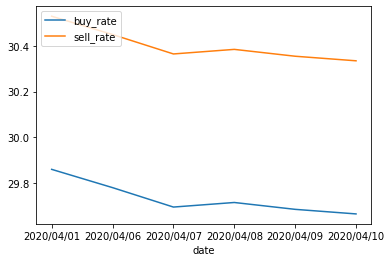

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
# 修正 history 之後的連結字串，更換特定時間
quote_history_url = history_rate_link.replace("history", "quote/2020-04")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    # print(date_string)
    # strptime 將 datetime string 轉換成 object
    # p表示parse，表示分析的意思，所以strptime是給定一個時間字元串和分析模式，返回一個時間對象（紀錄成時間元組）
    
    # strftime 將 datetime object 轉換成 String
    # f表示format，表示格式化，和strptime正好相反，要求給一個時間對象和輸出格式，返回一個時間字元串
    # strftime 可以用來獲得當前時間，可以將時間格式化為字元串等等，但是需要注意的是獲得的時間是服務器的時間，注意時區問題
    
    # 這裏將日期字元串轉成日期對象(datetime object)，再轉換成 String
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    print(date)
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})
print(HistoryExchangeRate)
HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
### 對frame列索引（columns）排序 ,預設升序，即ascending=True
### 對frame列索引（columns）降序排列，即ascending=False
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
print(HistoryExchangeRate)

# 畫出歷史匯率軌跡圖
# figsize表示的是圖表的長寬
plt.figure(figsize=(10, 10))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
# 設置數據說明位置
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金(USD)
https://rate.bot.com.tw/xrt/history/USD


<Figure size 720x720 with 0 Axes>

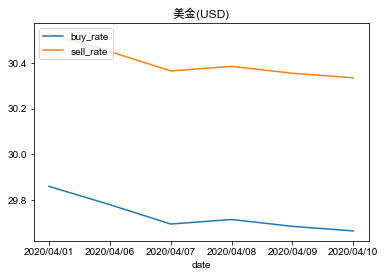

港幣(HKD)
https://rate.bot.com.tw/xrt/history/HKD


<Figure size 720x720 with 0 Axes>

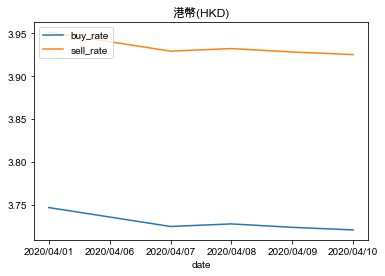

英鎊(GBP)
https://rate.bot.com.tw/xrt/history/GBP


<Figure size 720x720 with 0 Axes>

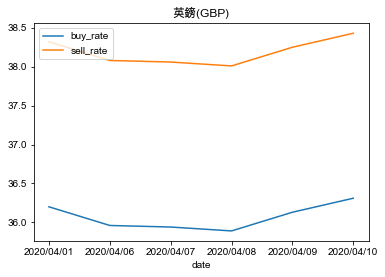

澳幣(AUD)
https://rate.bot.com.tw/xrt/history/AUD


<Figure size 720x720 with 0 Axes>

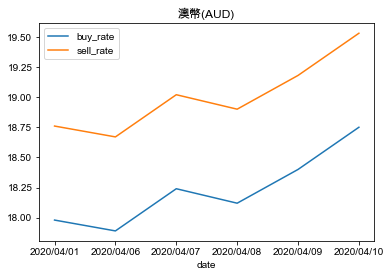

加拿大幣(CAD)
https://rate.bot.com.tw/xrt/history/CAD


<Figure size 720x720 with 0 Axes>

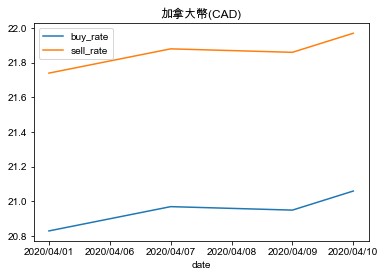

新加坡幣(SGD)
https://rate.bot.com.tw/xrt/history/SGD


<Figure size 720x720 with 0 Axes>

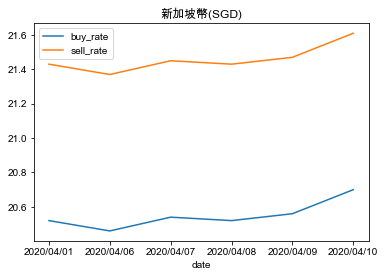

瑞士法郎(CHF)
https://rate.bot.com.tw/xrt/history/CHF


<Figure size 720x720 with 0 Axes>

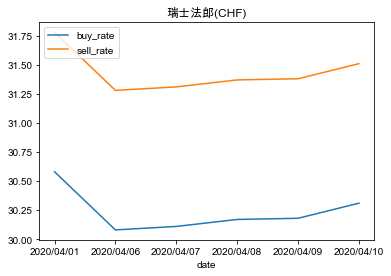

日圓(JPY)
https://rate.bot.com.tw/xrt/history/JPY


<Figure size 720x720 with 0 Axes>

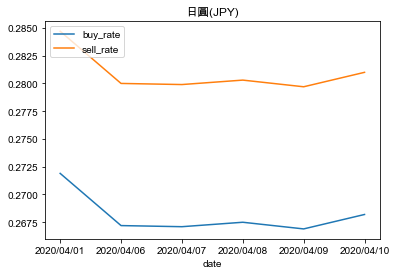

南非幣(ZAR)
https://rate.bot.com.tw/xrt/history/ZAR


<Figure size 720x720 with 0 Axes>

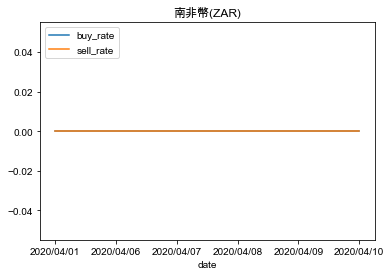

瑞典幣(SEK)
https://rate.bot.com.tw/xrt/history/SEK


<Figure size 720x720 with 0 Axes>

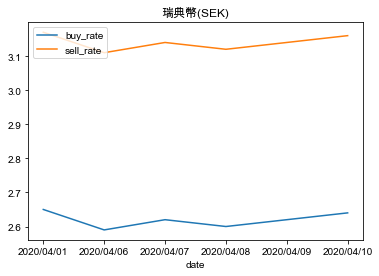

紐元(NZD)
https://rate.bot.com.tw/xrt/history/NZD


<Figure size 720x720 with 0 Axes>

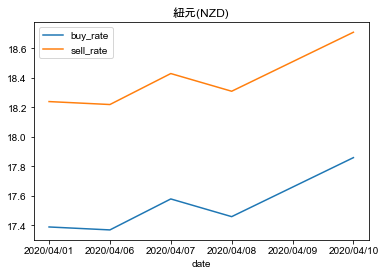

泰幣(THB)
https://rate.bot.com.tw/xrt/history/THB


<Figure size 720x720 with 0 Axes>

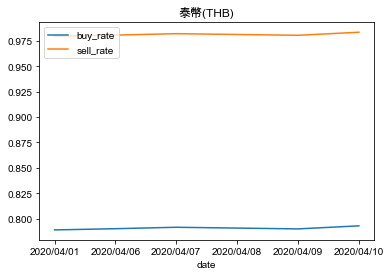

菲國比索(PHP)
https://rate.bot.com.tw/xrt/history/PHP


<Figure size 720x720 with 0 Axes>

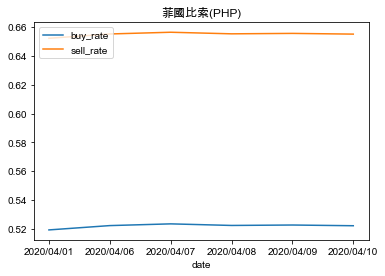

印尼幣(IDR)
https://rate.bot.com.tw/xrt/history/IDR


<Figure size 720x720 with 0 Axes>

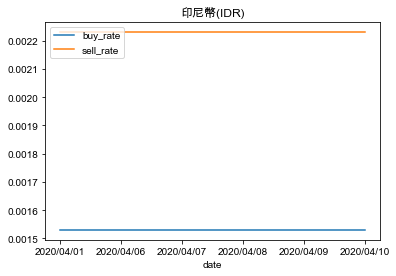

歐元(EUR)
https://rate.bot.com.tw/xrt/history/EUR


<Figure size 720x720 with 0 Axes>

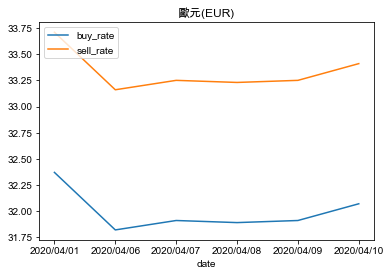

韓元(KRW)
https://rate.bot.com.tw/xrt/history/KRW


<Figure size 720x720 with 0 Axes>

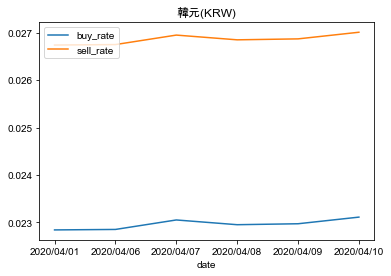

越南盾(VND)
https://rate.bot.com.tw/xrt/history/VND


<Figure size 720x720 with 0 Axes>

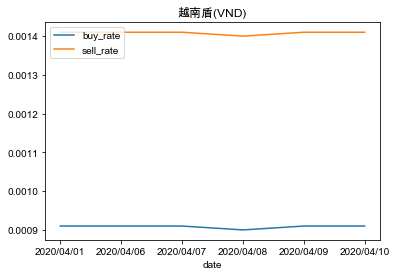

馬來幣(MYR)
https://rate.bot.com.tw/xrt/history/MYR


<Figure size 720x720 with 0 Axes>

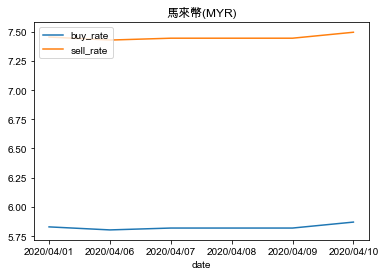

人民幣(CNY)
https://rate.bot.com.tw/xrt/history/CNY


<Figure size 720x720 with 0 Axes>

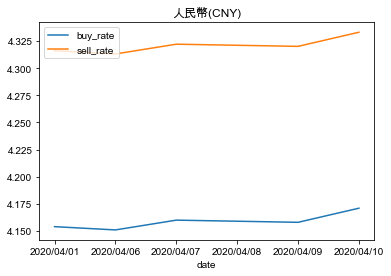

In [8]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for i in rate_table:
    currency = i.find(name='div', attrs={'class':'visible-phone print_hide'})
    title = currency.get_text()
    # 用正則表達式刪除空白字串
    title = re.sub(r"\s+", "", title)
    print(title)  # 貨幣種類
    history_link = i.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
    print(history_rate_link)
    quote_history_url = history_rate_link.replace("history", "quote/2020-04")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title': '歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    date_history = list()
    history_buy = list()
    history_sell = list()
    for history_rate in history_table:
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料
        history_ex_rate = history_rate.find_all(name='td',
                                                attrs={'class': 'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate': history_buy,
                                        'sell_rate': history_sell})
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    # figsize表示的是圖表的長寬
    plt.figure(figsize=(10, 10))
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    HistoryExchangeRate[['buy_rate', 'sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']]
    plt.title(title)
    # 設置數據說明位置
    plt.legend(loc="upper left")
    plt.show()

### 